In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from resnet import *


In [2]:
print(f"tensorlow version {tf.__version__}")

tensorlow version 2.13.1


In [3]:
# it is used for split dataset to train and valid
import splitfolders
def split_to_train_and_valid():
    splitfolders.ratio(train_dir, output="dataset", seed=1337, ratio=(.9, 0.1,0.0))
    

In [4]:
base_dir = "./datasets"

In [5]:
train_dir = os.path.join(base_dir,"train")
valid_dir = os.path.join(base_dir,"val")

In [6]:
train_cats_dir = os.path.join(train_dir,"cats")
train_dogs_dir = os.path.join(train_dir,"dogs")

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)



In [8]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    class_mode="binary",
    target_size = (150,150)
)

valid_data = valid_datagen.flow_from_directory(
    directory=valid_dir,
    batch_size=32,
    class_mode='binary',
    target_size = (150,150)
)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [2]:
model = ResNet50((150,150,3),classes=1, activation = "sigmoid")

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 156, 156, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 75, 75, 64)           9472      ['zero_padding2d[0][0]']      
                                                                                                  
 batch_normalization (Batch  (None, 75, 75, 64)           256       ['conv2d[0][0]']          

In [9]:
model = tf.keras.models.Sequential([
    # Input size (150,150,3)
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [10]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

#### ResNet Model works but it is a large cnn architecture for a simple task we have a bad result. One important role plays a size of image and target size. When i use a resnet training takes a lot of time and accuracy after 3 epochs equals ~53%
#### I create a simple cnn architucture and result was not bad

In [11]:
# when i use a resnet training takes a lot of time and accuracy after 3 epochs equals ~53%
history = model.fit(
    train_data,
    epochs=8,
    validation_data=valid_data,
    verbose=2
)


Epoch 1/8
704/704 - 395s - loss: 0.5843 - accuracy: 0.6850 - val_loss: 0.5038 - val_accuracy: 0.7452 - 395s/epoch - 561ms/step
Epoch 2/8
704/704 - 363s - loss: 0.4605 - accuracy: 0.7799 - val_loss: 0.4755 - val_accuracy: 0.7624 - 363s/epoch - 516ms/step
Epoch 3/8
704/704 - 370s - loss: 0.3852 - accuracy: 0.8251 - val_loss: 0.3913 - val_accuracy: 0.8192 - 370s/epoch - 525ms/step
Epoch 4/8
704/704 - 354s - loss: 0.3072 - accuracy: 0.8679 - val_loss: 0.3604 - val_accuracy: 0.8484 - 354s/epoch - 503ms/step
Epoch 5/8
704/704 - 358s - loss: 0.2066 - accuracy: 0.9155 - val_loss: 0.3905 - val_accuracy: 0.8448 - 358s/epoch - 508ms/step
Epoch 6/8
704/704 - 360s - loss: 0.1088 - accuracy: 0.9599 - val_loss: 0.4943 - val_accuracy: 0.8388 - 360s/epoch - 512ms/step
Epoch 7/8
704/704 - 369s - loss: 0.0533 - accuracy: 0.9816 - val_loss: 0.5901 - val_accuracy: 0.8392 - 369s/epoch - 524ms/step
Epoch 8/8
704/704 - 357s - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.7298 - val_accuracy: 0.8332 - 357s/epo

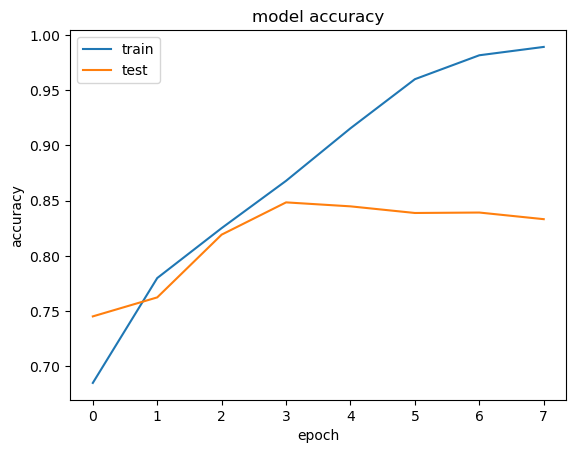

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


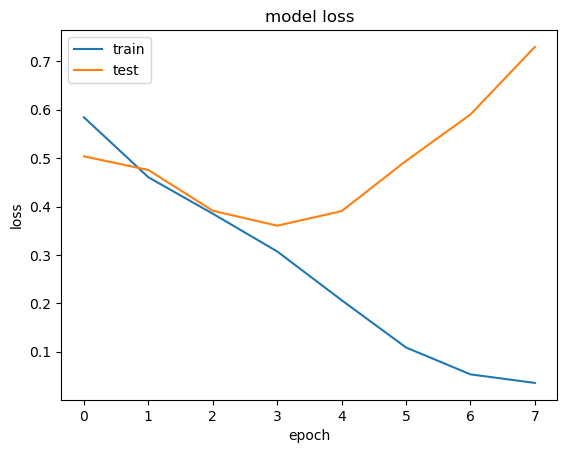

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# so after 4 epoch model is overfitting